In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read files
income_data = pd.read_csv('Resources/Income Ranges by Province.csv')
grad_school_data = pd.read_csv('Resources/Grad_Canada_Data.csv')

In [2]:
#clean the data, set the index
income_data = income_data.rename(columns={'Unnamed: 0': 'Province'})
income_data_clean = income_data.set_index('Province')
income_data_clean

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k
Province,,,,,
Quebec,71580,443825,708890,885030,214080
Ontario,168780,661800,1047750,1531890,559445
Alberta,45100,171735,295590,470795,181425
British Columbia,64815,244590,376870,542310,170830
Total Counts,350275,1521950,2429100,3430025,1125780


In [3]:
# clean the data - remove all irrelevant rows
grad_school_data = grad_school_data.dropna(axis='columns', how='all')
grad_school_clean = grad_school_data.dropna(axis='index', how='all')
grad_school_df = grad_school_clean.rename(columns={'Highest certificate, diploma or degree': 'Highest Education'})
grad_school_df = grad_school_df.set_index('Highest Education')
grad_school_clean_df = grad_school_df.rename(index={'Degree in medicine, dentistry, veterinary medicine or optometry': 'Medical Degree', "Master's degree": "Master's Degree", "Earned doctorate": "Doctorate"})
grad_school_clean_df

,Canada,Quebec,Ontario,Alberta,British Columbia
Highest Education,,,,,
Medical Degree,"214,110","43,755","90,530","23,875","32,985"
Master's Degree,"1,740,600","360,795","786,435","164,245","264,145"
Earned doctorate,"279,665","63,275","119,120","27,315","43,440"
Total,"2,234,375","467,825","996,085","215,435","340,570"


In [4]:
#transpose and clean
grad_school_transposed = grad_school_clean_df.transpose()
grad_school_final = grad_school_transposed.rename_axis('Province')
grad_school_final = grad_school_final.rename(columns={'Total':'Total Post Grad Students'})
grad_school_final

Highest Education,Medical Degree,Master's Degree,Earned doctorate,Total Post Grad Students
Province,,,,
Canada,"214,110","1,740,600","279,665","2,234,375"
Quebec,"43,755","360,795","63,275","467,825"
Ontario,"90,530","786,435","119,120","996,085"
Alberta,"23,875","164,245","27,315","215,435"
British Columbia,"32,985","264,145","43,440","340,570"


In [19]:
# merge the datasets
combined_df = pd.merge(income_data_clean, grad_school_final, how='inner', on='Province')
combined_df['Total Post Grad Students'] = combined_df['Total Post Grad Students'].replace(',', '', regex=True).astype(int)
combined_df

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k,Medical Degree,Master's Degree,Earned doctorate,Total Post Grad Students
Province,,,,,,,,,
Quebec,71580,443825,708890,885030,214080,"43,755","360,795","63,275",467825
Ontario,168780,661800,1047750,1531890,559445,"90,530","786,435","119,120",996085
Alberta,45100,171735,295590,470795,181425,"23,875","164,245","27,315",215435
British Columbia,64815,244590,376870,542310,170830,"32,985","264,145","43,440",340570


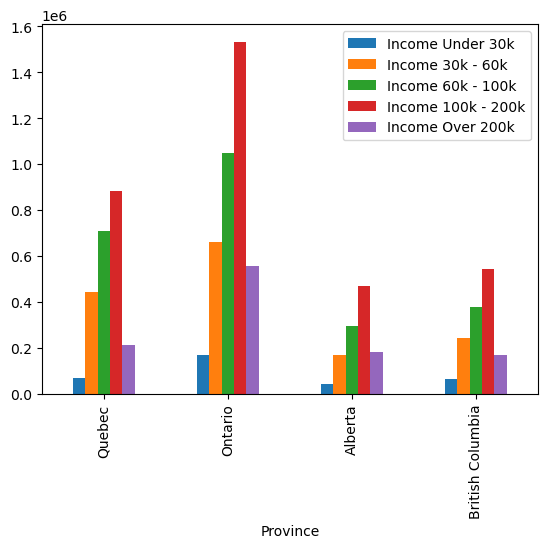

In [23]:
# plot graphs

income_graph = combined_df[['Income Under 30k', 'Income 30k - 60k', 'Income 60k - 100k', 'Income 100k - 200k', 'Income Over 200k']]
income_graph.plot(kind='bar')

plt.show()

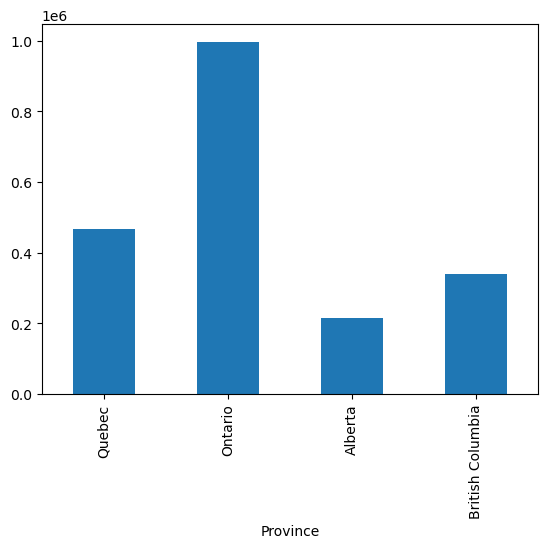

In [25]:
grad_graph = combined_df['Total Post Grad Students']

grad_graph.plot(kind='bar')
plt.show()

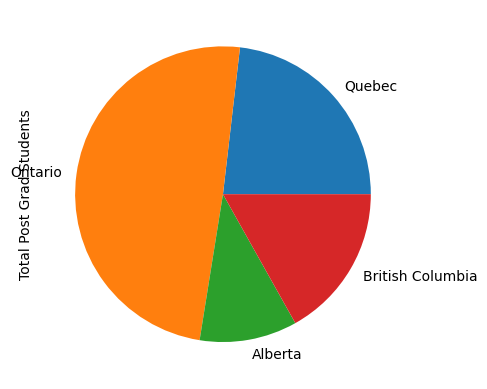

In [26]:
grad_graph.plot(kind='pie')
plt.show()

In [ ]:
# Merge into one df

# Find the percentage of grad students in each province (compared to rest of Canada)

# Create a line & bar graph (or another good graph) to see how the 2 variables compare --- maybe choose 2 income brackets
# Choose income bracket based on cost of grad school? 

In [ ]:
# Question 2: the top 5 nationalities of international students vs their country's gdp?

